## Problem Statement

Wine quality is dependent on a lot of factors which include the alcohol content in the wine,
the pH values, acidity, presence of suplhates to name a few. The several chemical ingredients
define the taste, smell and potency of the wine.We try group together different categories of
wine based on the percentage of chemicaal ingredients present in it.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.shape

(4898, 12)

In [4]:
# importing libraries for data preprocessing
from sklearn.preprocessing import StandardScaler as ss

In [5]:
# importing model for dimensionality reduction
from sklearn.decomposition import PCA

In [6]:
# importing libraries to performance analysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve

In [7]:
# importing libraries for data splitting
from sklearn.model_selection import train_test_split

In [8]:
# importing time and os
import time
import os
from scipy.stats import uniform

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
# checking for any null variables
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

No null values found in the dataset provided

## Exploring the Dataset

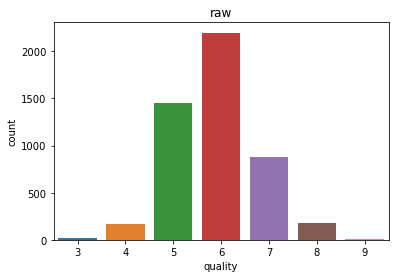

In [11]:
#For this first round, we attempt to do balancing

plt.figure()

sns.countplot('quality', data=df)

plt.title('raw')

plt.show()

In [12]:
df.quality.value_counts()
#df.isnull().sum()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [13]:
# We observe the quality levels 3 and 9 have less number of observations within the dataset provided.
# We map them into separate categories to drop the lowest levels

dict_quality = {
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8
}

df['quality'] = df['quality'].map(dict_quality)

# drop NaN columns
df = df.dropna()



In [14]:
df.quality.value_counts()

6.0    2198
5.0    1457
7.0     880
8.0     175
4.0     163
Name: quality, dtype: int64

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000
mean,6.851149,0.277995,0.334131,6.393741,0.045756,35.236097,138.251283,0.994026,3.188147,0.489934,10.513253,5.886518
std,0.837109,0.100592,0.121189,5.072535,0.021695,16.445156,42.011360,0.002990,0.150752,0.114136,1.229856,0.862730
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991730,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,138.500000,344.000000,1.038980,3.820000,1.080000,14.200000,8.000000


### Balancing the data


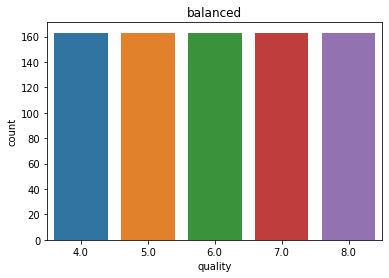

<function matplotlib.pyplot.clf()>

In [16]:
# Shuffle the Dataset
shuffled_df = df.sample(frac=1, random_state=4)

# put all the minority class in a separate dataset
q4_df = shuffled_df.loc[shuffled_df['quality'] == 4]

# Randomly select ? observations from the majority classes
q5_df = shuffled_df.loc[shuffled_df['quality'] == 5].sample(n=163, random_state=42)
q6_df = shuffled_df.loc[shuffled_df['quality'] == 6].sample(n=163, random_state=42)
q7_df = shuffled_df.loc[shuffled_df['quality'] == 7].sample(n=163, random_state=42)
q8_df = shuffled_df.loc[shuffled_df['quality'] == 8].sample(n=163, random_state=42)


# Concatenate all the dataframes into a single dataset
normalized_df = pd.concat([q4_df,q5_df,q6_df,q7_df,q8_df])

plt.figure()

sns.countplot('quality', data=normalized_df)

plt.title('balanced')

plt.show()

plt.clf


### Visualizing the pair plots

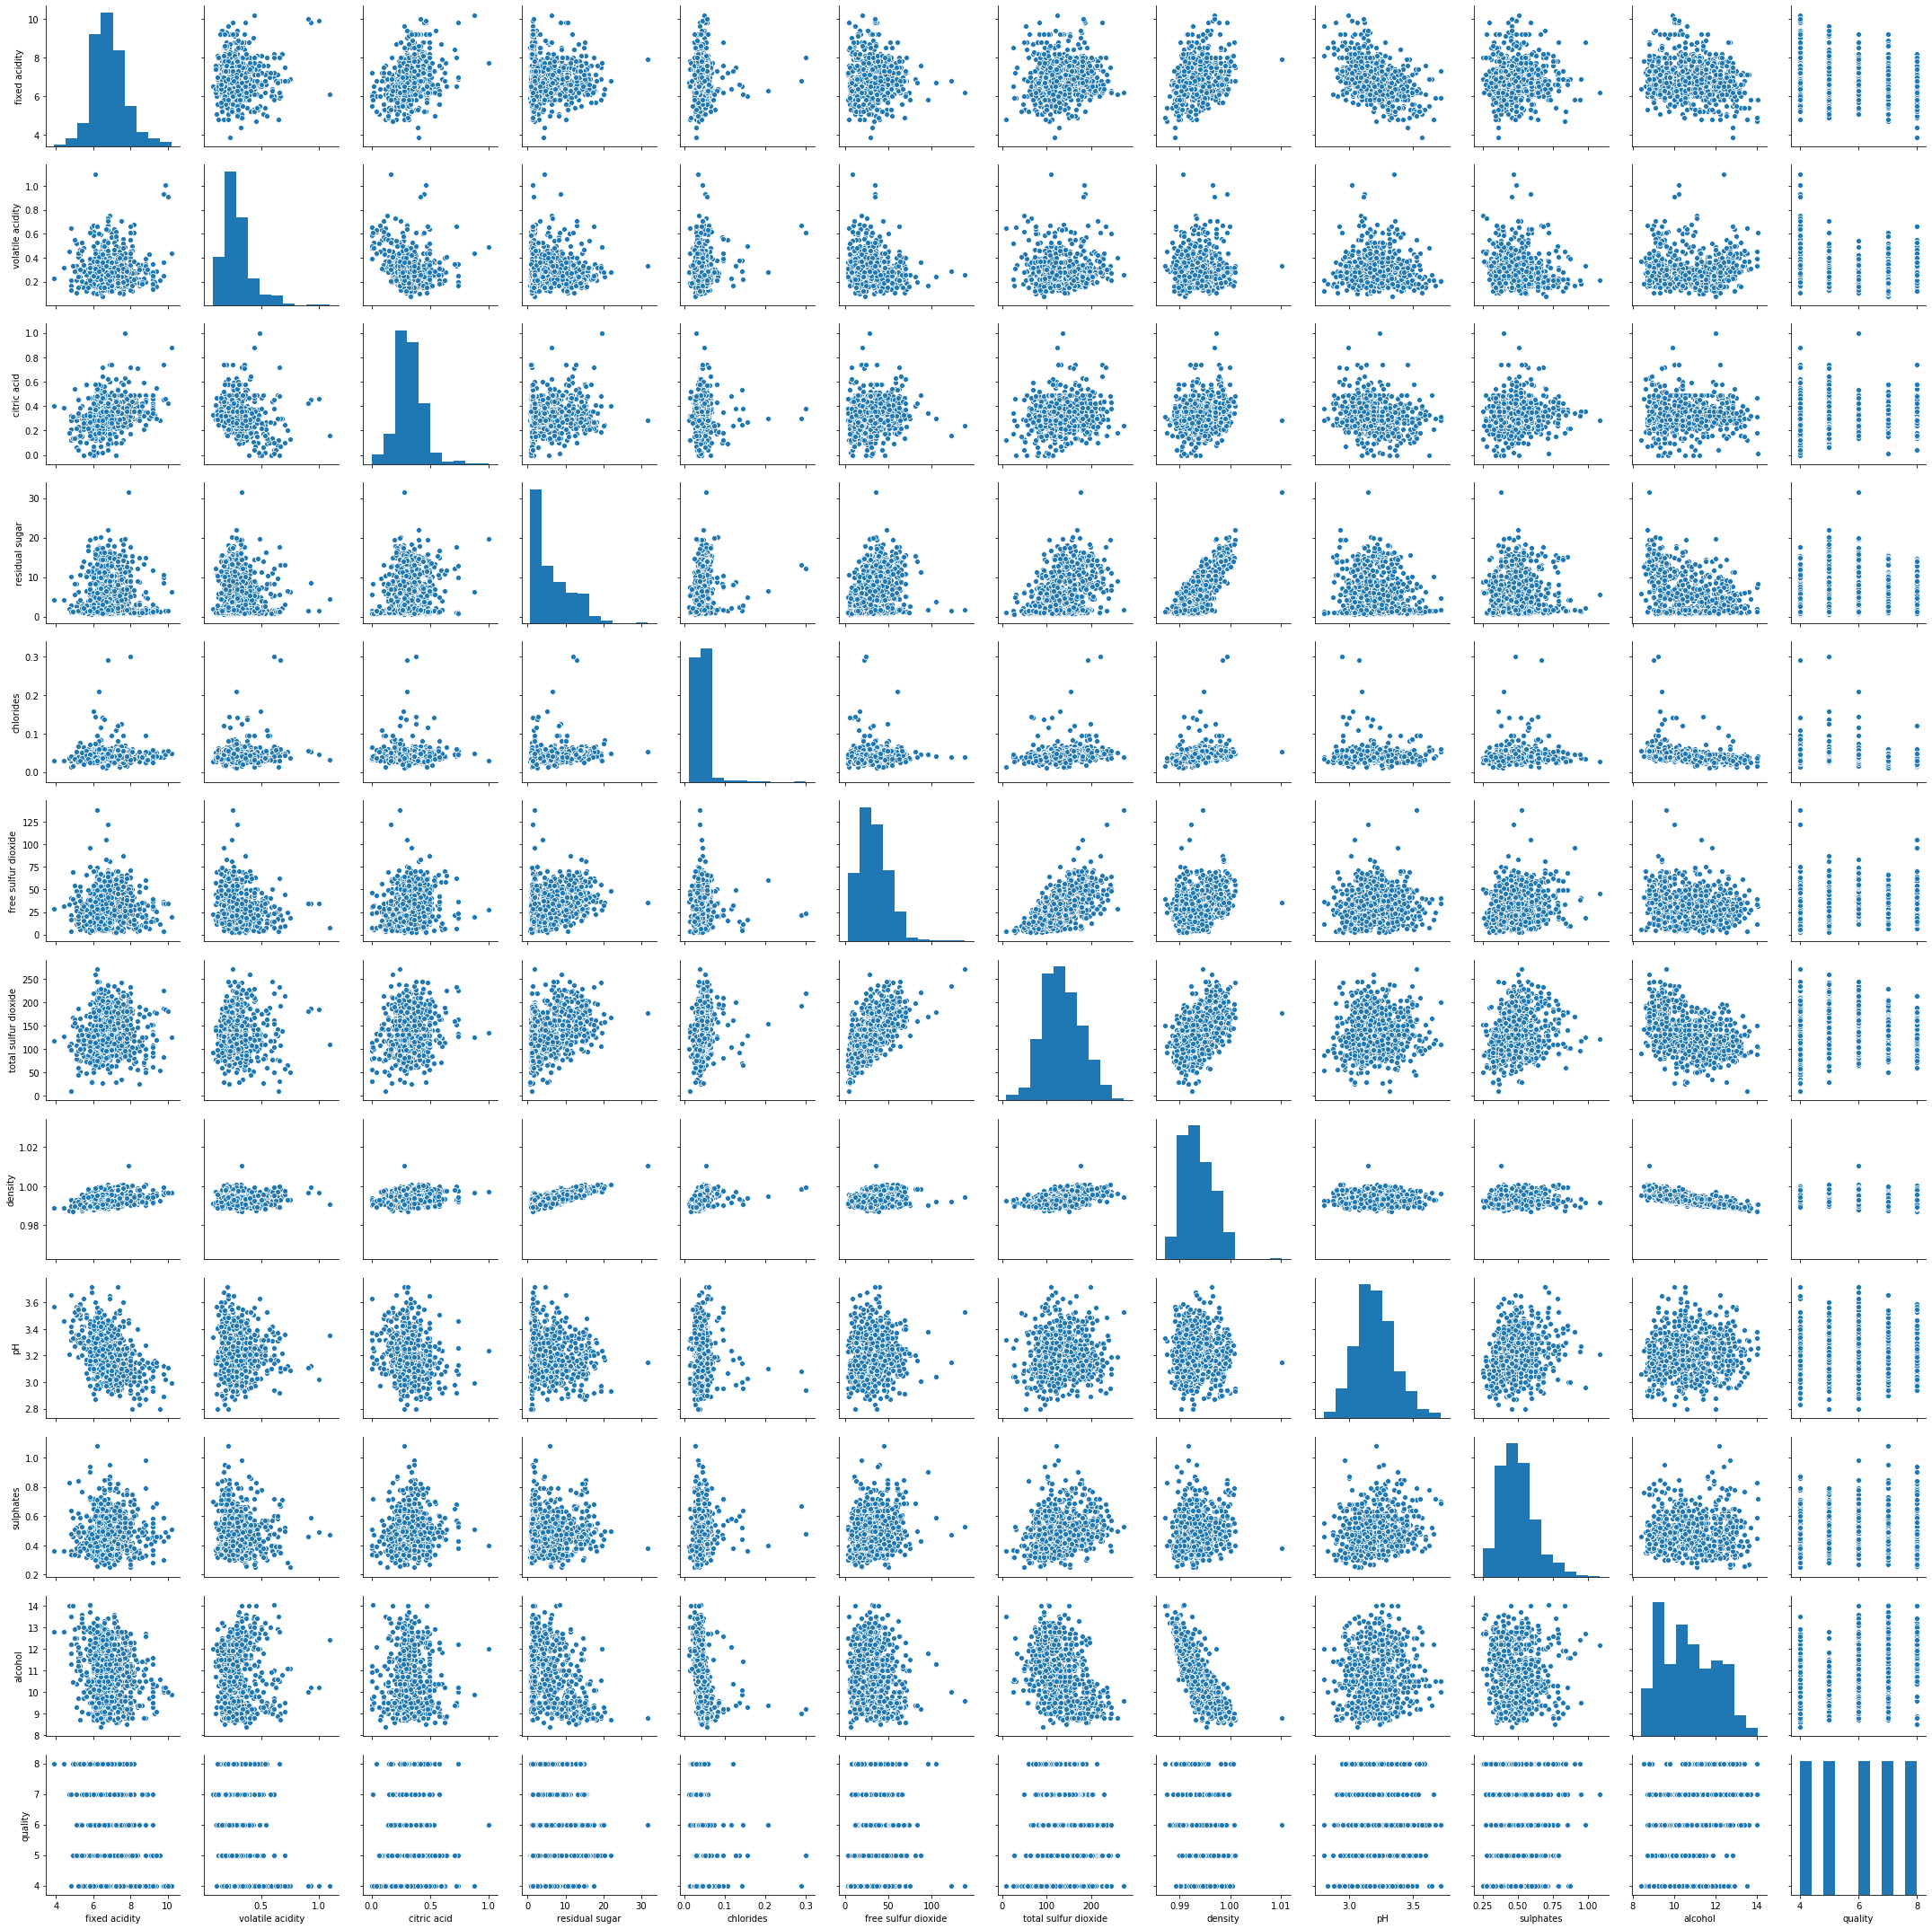

In [17]:
sns.pairplot(normalized_df)

## Correlation

In [18]:
correlation = normalized_df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.016584,0.329899,0.056514,0.060271,-0.050574,0.089945,0.290890,-0.452254,-0.034397,-0.178733,-0.149701
volatile acidity,0.016584,1.000000,-0.224522,-0.030362,0.120079,-0.187926,-0.008338,-0.017716,-0.020118,-0.091873,0.075972,-0.270637
citric acid,0.329899,-0.224522,1.000000,0.098169,-0.013620,0.085717,0.132832,0.123602,-0.142096,0.080407,-0.007040,0.055588
residual sugar,0.056514,-0.030362,0.098169,1.000000,0.165737,0.307634,0.410608,0.800518,-0.202572,-0.044165,-0.447238,-0.007361
chlorides,0.060271,0.120079,-0.013620,0.165737,1.000000,0.006899,0.249668,0.336599,-0.095332,0.049257,-0.387237,-0.252224
free sulfur dioxide,-0.050574,-0.187926,0.085717,0.307634,0.006899,1.000000,0.609156,0.253535,0.009701,0.159906,-0.174681,0.193370
total sulfur dioxide,0.089945,-0.008338,0.132832,0.410608,0.249668,0.609156,1.000000,0.547447,0.029441,0.157182,-0.467077,-0.091645
density,0.290890,-0.017716,0.123602,0.800518,0.336599,0.253535,0.547447,1.000000,-0.094401,0.065005,-0.821279,-0.320873
pH,-0.452254,-0.020118,-0.142096,-0.202572,-0.095332,0.009701,0.029441,-0.094401,1.000000,0.198060,0.109663,0.093974
sulphates,-0.034397,-0.091873,0.080407,-0.044165,0.049257,0.159906,0.157182,0.065005,0.198060,1.000000,-0.021512,0.028819


### Correlation Heat Map

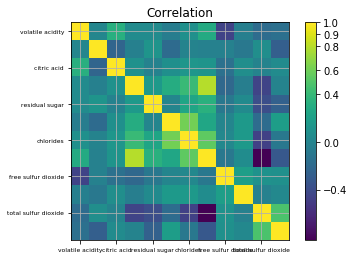

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(normalized_df.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation')
labels=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show() 

We now check the relation of quality of the wine with other features in the dataset. We try to understand what all factors affect the quality of the wine and by how much.

In [20]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484688
free sulfur dioxide     0.193370
pH                      0.093974
citric acid             0.055588
sulphates               0.028819
residual sugar         -0.007361
total sulfur dioxide   -0.091645
fixed acidity          -0.149701
chlorides              -0.252224
volatile acidity       -0.270637
density                -0.320873
Name: quality, dtype: float64

In the above fragment of code, a conclusion can be made that the attributes alcohol, free sulphur dioxide, pH and citric acid have maximum correlation with the 'quality' attribute.

Hence, these four attributes will be used further for pattern and correlation exploration. It can be noted clearly that the alcohol percentage has the highest correlation with the wine quality.

### Selecting four variables which we think will help us form good clusters
pH, citric acid, alcohol, free sulfur dioxide

### Using box plots to understand the relativeness of the quality of wine with respect to each of the chosen attributes

### 1. Alcohol percent vs Wine Quality

[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Quality Dataset'),
 Text(0.5, 1.0, 'Alcohol percent in different dataset quality types')]

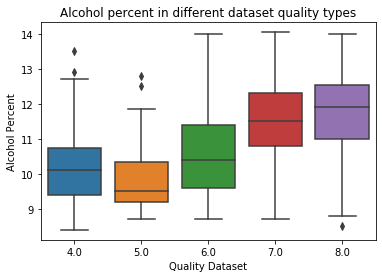

In [21]:
ax_plot = sns.boxplot(x='quality', y='alcohol', data=normalized_df)
ax_plot.set(xlabel='Quality Dataset', ylabel='Alcohol Percent', title='Alcohol percent in different dataset quality types')

### 2. Free Sulphur Dioxide percent vs Wine Quality

[Text(0, 0.5, 'free sulfur dioxide'),
 Text(0.5, 0, 'Quality Dataset'),
 Text(0.5, 1.0, 'Free Sulfur dioxide in different dataset quality types')]

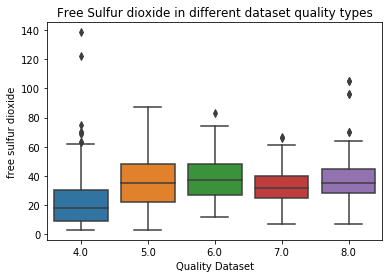

In [22]:
sdx_plot = sns.boxplot(x='quality', y='free sulfur dioxide', data=normalized_df)
sdx_plot.set(xlabel='Quality Dataset', ylabel='free sulfur dioxide', title='Free Sulfur dioxide in different dataset quality types')

### 3. pH vs Wine Quality

[Text(0, 0.5, 'pH'),
 Text(0.5, 0, 'Quality Dataset'),
 Text(0.5, 1.0, 'pH values for different dataset quality types')]

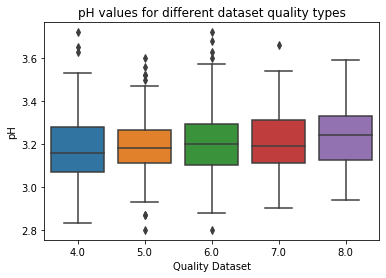

In [23]:
px_plot = sns.boxplot(x='quality', y='pH', data=normalized_df)
px_plot.set(xlabel='Quality Dataset', ylabel='pH', title='pH values for different dataset quality types')

### 4. Citric Acid vs Wine Quality

[Text(0, 0.5, 'citric acid'),
 Text(0.5, 0, 'Quality Dataset'),
 Text(0.5, 1.0, 'Citric Acid in different dataset quality types')]

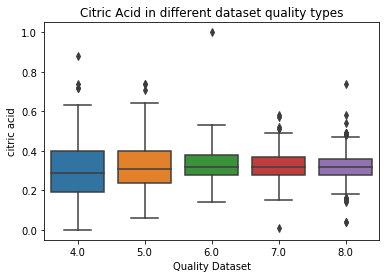

In [24]:
cx_plot = sns.boxplot(x='quality', y='citric acid', data=normalized_df)
cx_plot.set(xlabel='Quality Dataset', ylabel='citric acid', title='Citric Acid in different dataset quality types')

### Deduction from the box plots

By observing the box plots we can clerly observe the affect of the attrbute in the y-axis relative the attrbute in the x-axis, which is the wine quality. We can notice the variation in the box plot is decreasing. 

The variation in the box plot can be seen as high whe we compare wine quality with alcohol content in it.

The variation can be seen as gradually decreasing as we move on down to the attributes which are less strongly correlated to the quality of wine. 


## kmeans clustering




In [25]:
x = normalized_df.iloc[:,[2,5,8,10]].values

#x = normalized_df[['pH','citric acid','alcohol','free sulfur dioxide']]

In [26]:
from sklearn.cluster import KMeans

In [27]:
# K means clustering using the normalized x to fit the model

km2 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2.fit(x)

y_kmeans = km2.fit_predict(x)
#print(type(y_kmeans))
#print(y_kmeans)
x

array([[ 0.18,  9.  ,  3.38, 10.1 ],
       [ 0.25,  8.  ,  3.  ,  9.9 ],
       [ 0.32, 18.  ,  3.24, 10.7 ],
       ...,
       [ 0.28, 29.  ,  3.25, 12.4 ],
       [ 0.42, 41.  ,  3.47, 10.5 ],
       [ 0.48, 29.  ,  3.33, 12.8 ]])

### Finding the ideal number of Clusters

WCSS indicates how far are the points from its centroids.

Of course, with more centroids we expect that WCSS will be lower. 


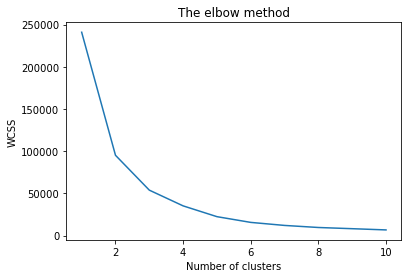

In [28]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#### Ideal number of Clusters = 3

### Visualizing the clusters


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


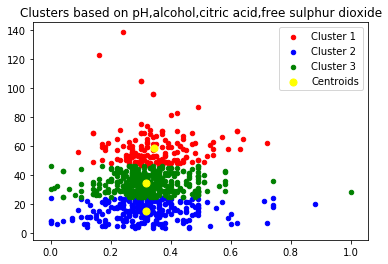

In [29]:
#Visualising the clusters by selecting only column 0 and 1
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')


#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
print (normalized_df.columns)
plt.title('Clusters based on pH,alcohol,citric acid,free sulphur dioxide')

plt.legend()
plt.show()

We can observe a clear clustering pattern between the different groups based on the attributes chosen. It can be deduced from the above the figure that quality of wine can be categorised into separate groups by affecting the prominent features which govern it. In this case, we observe factors like alcohol, pH, citric acid, free sulphur dioxide can be used to adjust the quality of wine produced.

### Using the unbalanced original dataset for clustering


In [30]:
x_org = df.iloc[:,[2,5,8,10]].values 

km2 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2.fit(x_org)

y_org_kmeans = km2.fit_predict(x_org)
#print(type(y_kmeans))
#print(y_kmeans)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


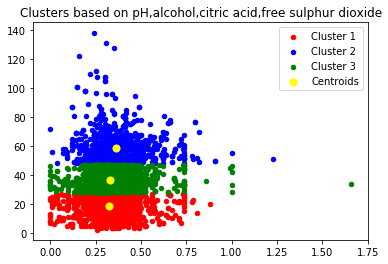

In [31]:
#Visualising the clusters by selecting only column 0 and 1
plt.scatter(x_org[y_org_kmeans == 0, 0], x_org[y_org_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x_org[y_org_kmeans == 1, 0], x_org[y_org_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x_org[y_org_kmeans == 2, 0], x_org[y_org_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')


#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
print (df.columns)
plt.title('Clusters based on pH,alcohol,citric acid,free sulphur dioxide')


plt.legend()
plt.show()

We observe the same pattern in clustering using the orginal unbalanced dataset as the balanced one with a clear categorisation of the dataset based on the chosen features

### Kmeans clustering using the standardized values for x_sdr with all features included


In [32]:
# Creating a standardized version of x so that the values fall within the same range
x_sdr = normalized_df.iloc[:,:]
x_sdr = x_sdr.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
 
# Converting the dataframe to a numpy array
x_sdr = x_sdr.iloc[:,:].values
x_sdr

# we can use both versions of x and x_sdr to fit our model and check the grouping


array([[ 0.0222417 , -0.05187658, -0.14371779, ..., -0.02971395,
        -0.10933637, -0.5       ],
       [-0.05712338, -0.00285697, -0.07371779, ..., -0.06585853,
        -0.1447346 , -0.5       ],
       [ 0.06986075,  0.19322146, -0.00371779, ..., -0.05381033,
        -0.00314168, -0.5       ],
       ...,
       [-0.05712338,  0.06577048, -0.04371779, ...,  0.18715352,
         0.29774327,  0.5       ],
       [-0.00950433, -0.03226874,  0.09628221, ..., -0.01766576,
        -0.03853991,  0.5       ],
       [-0.10474243,  0.35988813,  0.15628221, ..., -0.12609949,
         0.36853973,  0.5       ]])

In [33]:
km2 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2.fit(x_sdr)

y_sdr_kmeans = km2.fit_predict(x_sdr)
y_sdr_kmeans[0:5]


array([2, 2, 2, 1, 2])

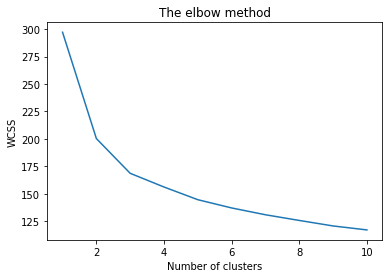

In [34]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_sdr)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

We observe there is a marginal shift in the elbow when we use a standardized version of x
#### Ideal number of clusters = 5

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


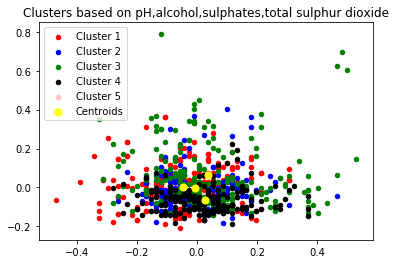

In [35]:
#Visualising the clusters by selecting only column 0 and 1
plt.scatter(x_sdr[y_sdr_kmeans == 0, 0], x_sdr[y_sdr_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x_sdr[y_sdr_kmeans == 1, 0], x_sdr[y_sdr_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x_sdr[y_sdr_kmeans == 2, 0], x_sdr[y_sdr_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x_sdr[y_sdr_kmeans == 3, 0], x_sdr[y_sdr_kmeans == 3, 1], s = 20, c = 'black', label = 'Cluster 4')
plt.scatter(x_sdr[y_sdr_kmeans == 4, 0], x_sdr[y_sdr_kmeans == 4, 1], s = 20, c = 'pink', label = 'Cluster 5')


#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
print (df.columns)
plt.title('Clusters based on pH,alcohol,sulphates,total sulphur dioxide')


plt.legend()
plt.show()

By using the standardized dataset with all the features we observe the clustering pattern is overlapping and dense and there is no clear demarcation between the clusters


### K means Analysis and Conclusion

The usage of this analysis will help to understand whether by modifying a certain set of features, we would be able to increase the quality of the wine. The correlation matrix has effectively guided us to chose the most relavant attributes that can affect the wine quality. Plotting graphs of relation between different variables is the basic step to determine the factors that have a larger impact and to work upon those factors. As seen,this clustering method was clearly able to group the wine into separate clusters based on the chosen attrbutes. This will help us to identify the quality of wine based on the grouping done. 